# Portfolio Analytics AI - Getting Started

This notebook demonstrates the basic functionality of the Portfolio Analytics AI package.

## Overview
- Create a portfolio with multiple assets
- Load historical data
- Calculate basic performance metrics
- Optimize portfolio weights
- Visualize results

In [1]:
# Import necessary libraries
import sys
import os

# Add src to path for imports
sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd()), 'src'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from portfolio_analytics import Portfolio, DataProvider
from portfolio_analytics.optimization import PortfolioOptimizer
from portfolio_analytics.visualization import PortfolioVisualizer

# Set up plotting
plt.style.use('seaborn-v0_8')
%matplotlib inline

/Volumes/work_ext/work/PortfolioAnalyticsAI/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## 1. Create a Portfolio

Let's create a portfolio with some popular tech stocks.

In [2]:
# Define portfolio symbols
symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']

# Create portfolio with equal weights
portfolio = Portfolio(symbols, name="Tech Portfolio")

print(f"Created portfolio: {portfolio}")
print(f"Initial weights: {dict(zip(symbols, portfolio.weights))}")

Created portfolio: Portfolio(name='Tech Portfolio', symbols=['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA'], n_assets=5)
Initial weights: {'AAPL': np.float64(0.2), 'GOOGL': np.float64(0.2), 'MSFT': np.float64(0.2), 'AMZN': np.float64(0.2), 'TSLA': np.float64(0.2)}


## 2. Load Historical Data

We'll use the DataProvider to fetch historical price data from Yahoo Finance.

In [3]:
# Initialize data provider
data_provider = DataProvider(source="yahoo")

# Load historical data (last 3 years)
try:
    portfolio.load_data(
        data_provider=data_provider,
        start_date="2021-01-01",
        end_date="2024-01-01"
    )
    print("Data loaded successfully!")
    print(f"Data shape: {portfolio.data.shape}")
    print(f"Date range: {portfolio.data.index[0]} to {portfolio.data.index[-1]}")
except Exception as e:
    print(f"Error loading data: {e}")
    print("Note: This example requires internet connection and yfinance package")

[*********************100%***********************]  5 of 5 completed

Data loaded successfully!
Data shape: (753, 5)
Date range: 2021-01-04 00:00:00 to 2023-12-29 00:00:00


## 3. Basic Portfolio Analysis

In [4]:
# Calculate basic metrics
if portfolio.data is not None:
    print("Portfolio Performance Metrics:")
    print(f"Annual Return: {portfolio.annual_return():.2%}")
    print(f"Annual Volatility: {portfolio.annual_volatility():.2%}")
    print(f"Sharpe Ratio: {portfolio.sharpe_ratio():.3f}")
    print(f"Value at Risk (95%): {portfolio.calculate_var(0.95):.2%}")
    
    # Get comprehensive performance metrics
    performance_metrics = portfolio.get_performance_metrics()
    print("\nDetailed Performance Metrics:")
    for metric, value in performance_metrics.items():
        if isinstance(value, float):
            print(f"{metric}: {value:.4f}")
        else:
            print(f"{metric}: {value}")
else:
    print("No data available for analysis. Please check data loading step.")

Portfolio Performance Metrics:
Annual Return: 17.08%
Annual Volatility: 29.74%
Sharpe Ratio: 0.507
Value at Risk (95%): 3.16%

Detailed Performance Metrics:
total_return: 0.4592
annual_return: 0.1708
average_monthly_return: 0.0141
average_quarterly_return: 0.0446
best_month: 0.1876
worst_month: -0.1653
positive_months: 18
negative_months: 18
annual_volatility: 0.2974
daily_volatility: 0.0187
skewness: -0.0035
kurtosis: 1.0226
sharpe_ratio: 0.5072
calmar_ratio: 0.3680
sortino_ratio: 0.7689
max_drawdown: 0.4642


/Volumes/work_ext/work/PortfolioAnalyticsAI/src/portfolio_analytics/performance.py:64: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
/Volumes/work_ext/work/PortfolioAnalyticsAI/src/portfolio_analytics/performance.py:65: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_returns = returns.resample('Q').apply(lambda x: (1 + x).prod() - 1)


## 4. Portfolio Optimization

Let's optimize the portfolio to maximize the Sharpe ratio.

In [5]:
if portfolio.data is not None:
    try:
        # Store original weights
        original_weights = portfolio.weights.copy()
        
        # Optimize for maximum Sharpe ratio
        optimized_weights = portfolio.optimize(method="max_sharpe")
        
        print("Portfolio Optimization Results:")
        print("\nOriginal vs Optimized Weights:")
        
        comparison_df = pd.DataFrame({
            'Symbol': symbols,
            'Original': original_weights,
            'Optimized': optimized_weights,
            'Change': optimized_weights - original_weights
        })
        
        print(comparison_df.round(4))
        
        # Calculate metrics for optimized portfolio
        print(f"\nOptimized Portfolio Metrics:")
        print(f"Annual Return: {portfolio.annual_return():.2%}")
        print(f"Annual Volatility: {portfolio.annual_volatility():.2%}")
        print(f"Sharpe Ratio: {portfolio.sharpe_ratio():.3f}")
        
    except Exception as e:
        print(f"Optimization failed: {e}")
        print("Note: Optimization requires scipy package")
else:
    print("No data available for optimization.")

Portfolio Optimization Results:

Original vs Optimized Weights:
  Symbol  Original  Optimized  Change
0   AAPL       0.2     0.0130 -0.1870
1  GOOGL       0.2     0.1232 -0.0768
2   MSFT       0.2     0.8638  0.6638
3   AMZN       0.2     0.0000 -0.2000
4   TSLA       0.2     0.0000 -0.2000

Optimized Portfolio Metrics:
Annual Return: 22.77%
Annual Volatility: 27.29%
Sharpe Ratio: 0.761


## 5. Visualization

Let's create some visualizations of our portfolio.

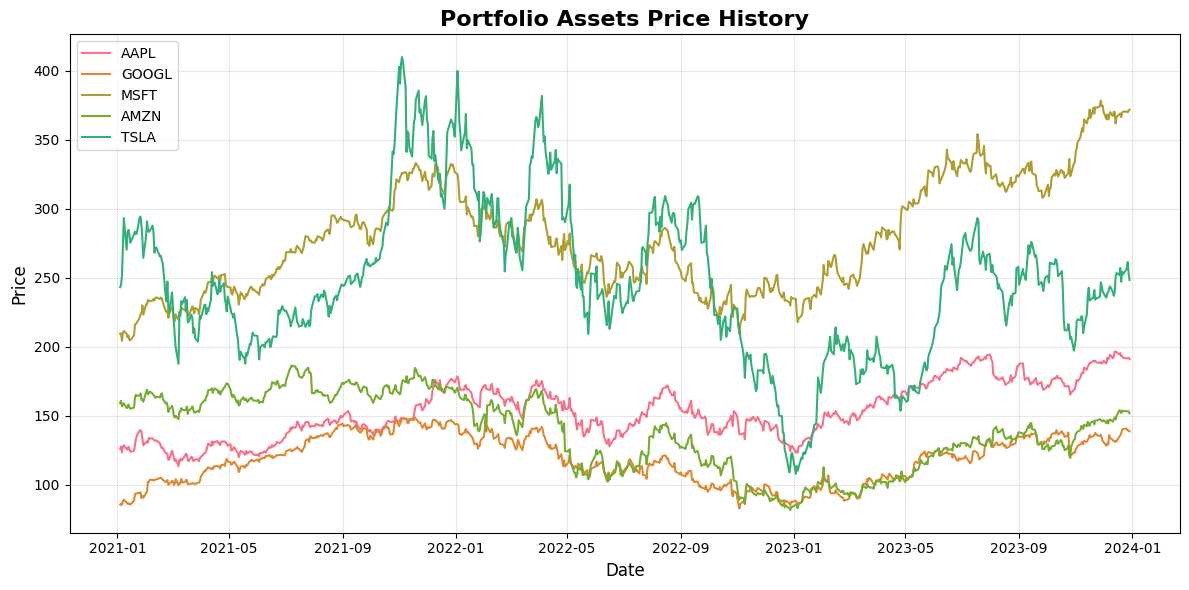

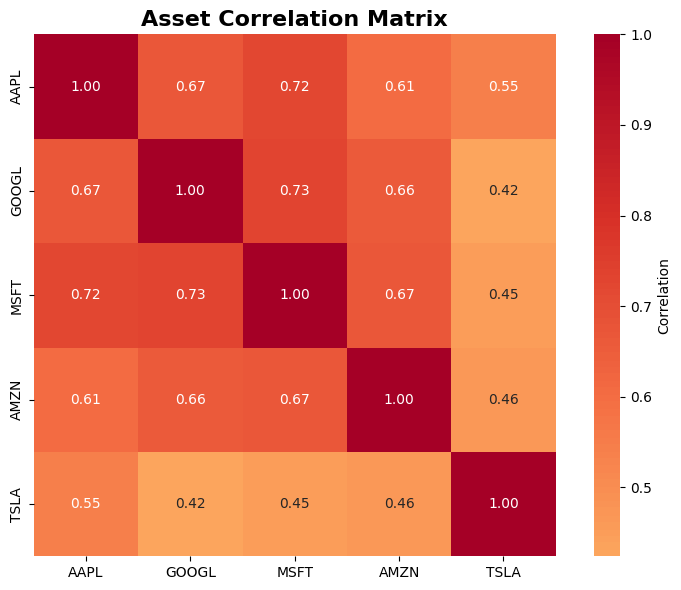

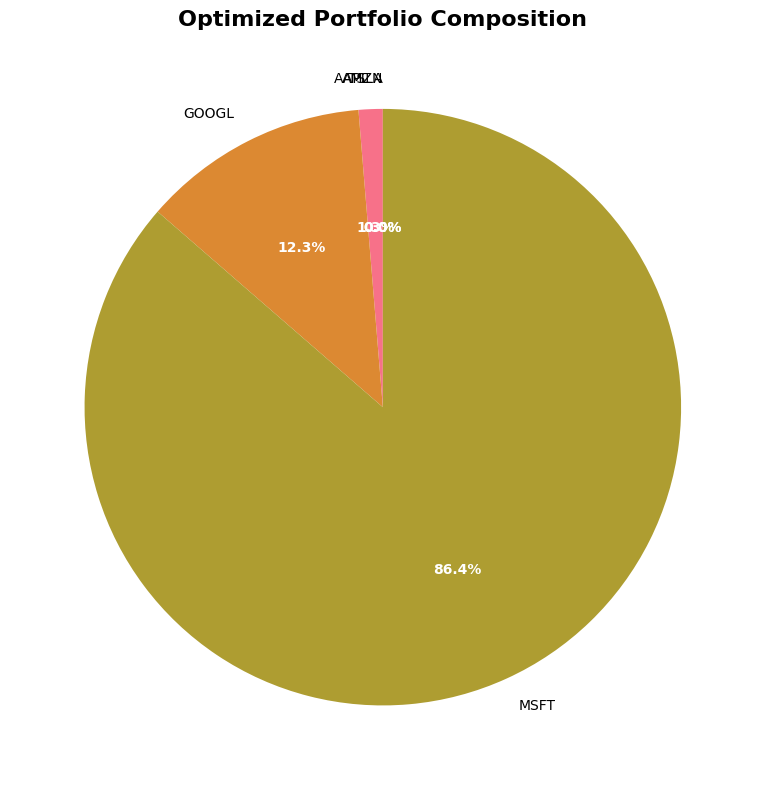

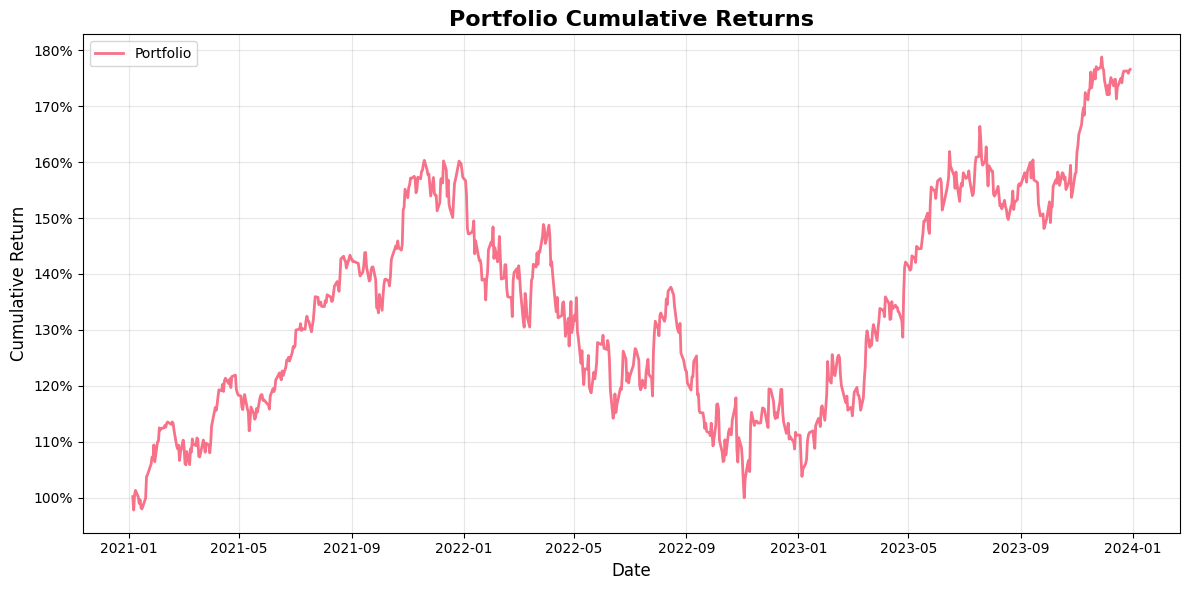

In [6]:
if portfolio.data is not None:
    # Initialize visualizer
    visualizer = PortfolioVisualizer()
    
    # Plot price history
    try:
        visualizer.plot_price_history(
            portfolio.data,
            title="Portfolio Assets Price History",
            figsize=(12, 6)
        )
    except Exception as e:
        print(f"Error plotting price history: {e}")
    
    # Plot correlation matrix
    try:
        visualizer.plot_correlation_matrix(
            portfolio.returns,
            title="Asset Correlation Matrix",
            figsize=(8, 6)
        )
    except Exception as e:
        print(f"Error plotting correlation matrix: {e}")
    
    # Plot portfolio composition
    try:
        weights_dict = dict(zip(symbols, portfolio.weights))
        visualizer.plot_portfolio_composition(
            weights_dict,
            title="Optimized Portfolio Composition",
            chart_type="pie",
            figsize=(8, 8)
        )
    except Exception as e:
        print(f"Error plotting portfolio composition: {e}")
        
    # Plot cumulative returns
    try:
        portfolio_returns = (portfolio.returns * portfolio.weights).sum(axis=1)
        visualizer.plot_cumulative_returns(
            portfolio_returns,
            title="Portfolio Cumulative Returns",
            figsize=(12, 6)
        )
    except Exception as e:
        print(f"Error plotting cumulative returns: {e}")
else:
    print("No data available for visualization.")

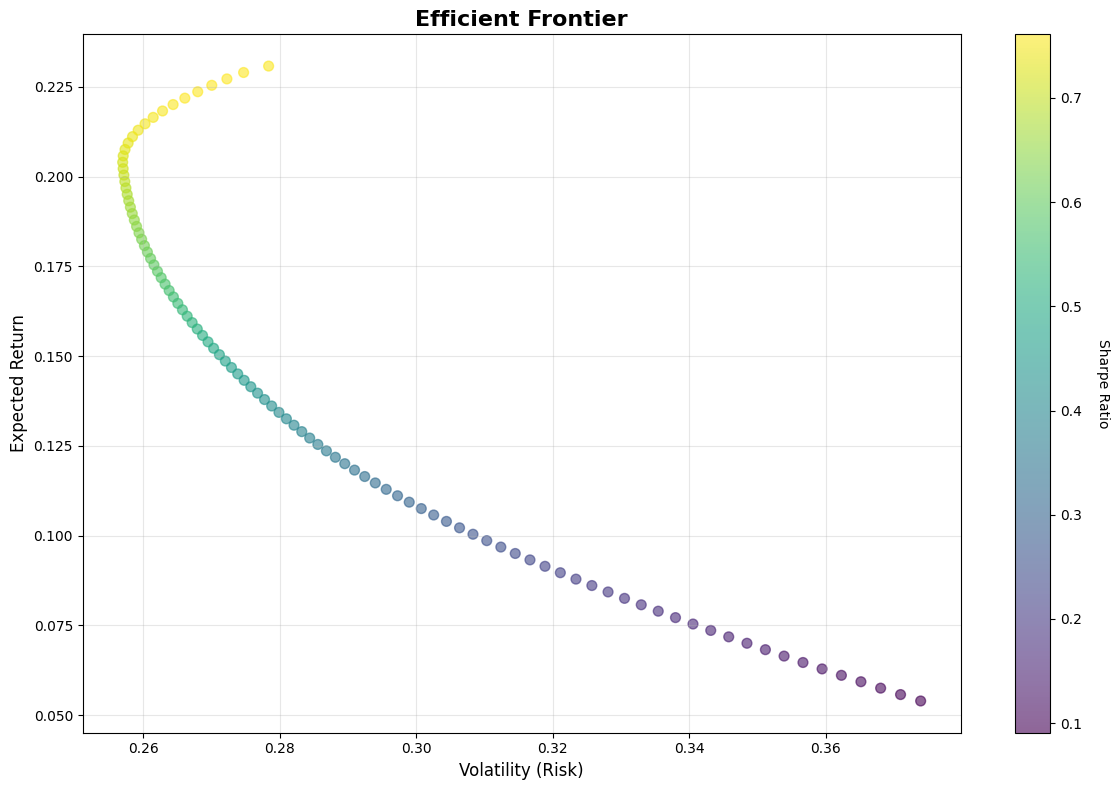

In [10]:
if portfolio.data is not None:
    # Initialize optimizer
    optimizer = PortfolioOptimizer()
    
    # Calculate efficient frontier
    try:
        returns_array, volatilities_array, sharpe_ratios_array = optimizer.calculate_efficient_frontier(portfolio.returns)
        
        # Plot efficient frontier
        visualizer.plot_efficient_frontier(
            returns_array,
            volatilities_array,
            sharpe_ratios_array,
            title="Efficient Frontier",
            figsize=(12, 8)
        )
    except Exception as e:
        print(f"Error plotting efficient frontier: {e}")
else:
    print("No data available for visualization.")



## 6. Risk Analysis

In [8]:
if portfolio.data is not None:
    # Calculate comprehensive risk metrics
    portfolio_returns = (portfolio.returns * portfolio.weights).sum(axis=1)
    
    risk_metrics = portfolio.risk_model.calculate_risk_metrics(
        portfolio_returns,
        confidence_levels=[0.95, 0.99]
    )
    
    print("Risk Analysis:")
    print("=" * 40)
    
    for metric, value in risk_metrics.items():
        if isinstance(value, float):
            if 'var' in metric.lower() or 'expected_shortfall' in metric.lower():
                print(f"{metric}: {value:.2%}")
            elif 'ratio' in metric.lower():
                print(f"{metric}: {value:.3f}")
            else:
                print(f"{metric}: {value:.4f}")
        else:
            print(f"{metric}: {value}")
else:
    print("No data available for risk analysis.")

Risk Analysis:
volatility: 0.2729
skewness: 0.0661
kurtosis: 1.6533
var_95: 2.68%
expected_shortfall_95: 3.66%
var_99: 4.08%
expected_shortfall_99: 4.96%
max_drawdown: 0.3762
drawdown_duration: 241
recovery_time: 153
max_drawdown_date: 2022-11-03 00:00:00
downside_deviation: 0.0167
sortino_ratio: 0.780
calmar_ratio: 0.605
tracking_error: 0.2729


## 7. Portfolio Summary

In [9]:
# Generate comprehensive portfolio summary
summary = portfolio.summary()

print("Portfolio Summary:")
print("=" * 50)

for key, value in summary.items():
    if isinstance(value, dict):
        print(f"\n{key.upper()}:")
        for subkey, subvalue in value.items():
            print(f"  {subkey}: {subvalue}")
    elif isinstance(value, list):
        print(f"{key}: {', '.join(map(str, value))}")
    elif isinstance(value, float):
        if any(metric in key.lower() for metric in ['return', 'volatility', 'var']):
            print(f"{key}: {value:.2%}")
        else:
            print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")

Portfolio Summary:
name: Tech Portfolio
symbols: AAPL, GOOGL, MSFT, AMZN, TSLA
weights: 0.013036554582529987, 0.12316755562371787, 0.8637958897937537, 0.0, 0.0
annual_return: 22.77%
annual_volatility: 27.29%
sharpe_ratio: 0.7611
var_95: 2.68%

DATA_PERIOD:
  start: 2021-01-04
  end: 2023-12-29
  days: 753


## Conclusion

This notebook demonstrated the basic functionality of the Portfolio Analytics AI package:

1. **Portfolio Creation**: Created a diversified tech portfolio
2. **Data Loading**: Fetched historical price data from Yahoo Finance
3. **Performance Analysis**: Calculated key performance metrics
4. **Optimization**: Optimized weights to maximize Sharpe ratio
5. **Visualization**: Created charts to visualize portfolio performance
6. **Risk Analysis**: Analyzed various risk metrics including VaR

### Next Steps

- Explore other optimization methods (minimum variance, target return)
- Add benchmark comparison (e.g., S&P 500)
- Implement more advanced risk models
- Create custom constraints for optimization
- Build interactive dashboards